In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
import PIL
from tensorflow import keras
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Flatten,MaxPool2D
from tensorflow.keras import layers, Input
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense,Dropout
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.image as mpimg
from keras.utils import to_categorical
from PIL import Image
%matplotlib inline

In [3]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [4]:
data = []
labels = []
images = []
no_of_classes = len(classes)
train_path = 'Train'

In [5]:
for x in os.listdir(train_path):
    count=0
    for root_dir, cur_dir, files in os.walk(train_path + '/' + x):
        count += len(files)
    print('Number of images in class ' + str(int(x)) + ' = ' + str(count))

Number of images in class 0 = 178
Number of images in class 1 = 2192
Number of images in class 10 = 1978
Number of images in class 11 = 1292
Number of images in class 12 = 2067
Number of images in class 13 = 2127
Number of images in class 14 = 746
Number of images in class 15 = 596
Number of images in class 16 = 396
Number of images in class 17 = 1074
Number of images in class 18 = 1169
Number of images in class 19 = 176
Number of images in class 2 = 2218
Number of images in class 20 = 328
Number of images in class 21 = 299
Number of images in class 22 = 357
Number of images in class 23 = 477
Number of images in class 24 = 238
Number of images in class 25 = 1468
Number of images in class 26 = 568
Number of images in class 27 = 207
Number of images in class 28 = 505
Number of images in class 29 = 238
Number of images in class 3 = 1378
Number of images in class 30 = 417
Number of images in class 31 = 747
Number of images in class 32 = 209
Number of images in class 33 = 657
Number of imag

In [6]:
for i in range(no_of_classes):
    path = os.path.join(train_path,str(i))
    images = os.listdir(path)
    for x in images:
        image = Image.open(path + '\\'+ x)
        image = image.resize((30,30))
        image = np.array(image)
        #sim = Image.fromarray(image)
        data.append(image)
        labels.append(i)

In [7]:
test_dir = 'Test'
print('Number of images in test dataset = ' + str(len(os.listdir(test_dir))))

Number of images in test dataset = 12630


In [8]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(37829, 30, 30, 3) (37829,)


In [9]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30263, 30, 30, 3) (7566, 30, 30, 3) (30263,) (7566,)


In [10]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [12]:
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test=np.array(data)

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
#model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(rate=0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                      

In [12]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
946/946 [==============================] - 69s 72ms/step - loss: 2.1981 - accuracy: 0.4476 - val_loss: 0.7298 - val_accuracy: 0.8372
Epoch 2/15
946/946 [==============================] - 69s 73ms/step - loss: 0.9463 - accuracy: 0.7208 - val_loss: 0.2960 - val_accuracy: 0.9207
Epoch 3/15
946/946 [==============================] - 69s 73ms/step - loss: 0.6522 - accuracy: 0.8014 - val_loss: 0.2489 - val_accuracy: 0.9281
Epoch 4/15
946/946 [==============================] - 71s 75ms/step - loss: 0.5244 - accuracy: 0.8431 - val_loss: 0.1497 - val_accuracy: 0.9572
Epoch 5/15
946/946 [==============================] - 72s 76ms/step - loss: 0.4387 - accuracy: 0.8681 - val_loss: 0.1332 - val_accuracy: 0.9654
Epoch 6/15
946/946 [==============================] - 70s 74ms/step - loss: 0.3940 - accuracy: 0.8830 - val_loss: 0.1501 - val_accuracy: 0.9597
Epoch 7/15
946/946 [==============================] - 74s 78ms/step - loss: 0.3361 - accuracy: 0.9045 - val_loss: 0.0947 - val_accuracy:

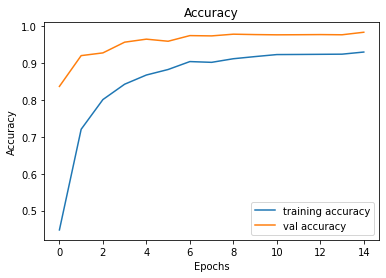

In [15]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

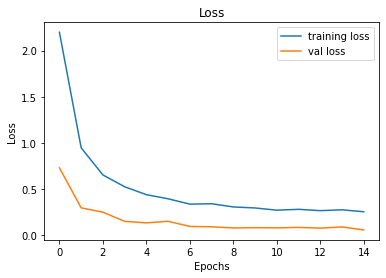

In [16]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

#Accuracy with the test data
print(accuracy_score(labels, pred))

395/395 [==============================] - 4s 11ms/step
0.9450514647664291


In [34]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(labels, pred)

array([[[12570,     0],
        [    9,    51]],

       [[11896,    14],
        [   25,   695]],

       [[11807,    73],
        [   20,   730]],

       [[12139,    41],
        [   37,   413]],

       [[11939,    31],
        [   31,   629]],

       [[11915,    85],
        [   49,   581]],

       [[12479,     1],
        [   21,   129]],

       [[12165,    15],
        [   52,   398]],

       [[12129,    51],
        [    8,   442]],

       [[12147,     3],
        [    2,   478]],

       [[11960,    10],
        [    8,   652]],

       [[12190,    20],
        [   20,   400]],

       [[11929,    11],
        [   17,   673]],

       [[11889,    21],
        [    5,   715]],

       [[12358,     2],
        [    0,   270]],

       [[12401,    19],
        [    2,   208]],

       [[12480,     0],
        [    2,   148]],

       [[12270,     0],
        [   13,   347]],

       [[12223,    17],
        [   68,   322]],

       [[12564,     6],
        [   14,    46]],



In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(labels, pred))

[[ 51   0   0 ...   0   0   0]
 [  0 695   3 ...   0   0   0]
 [  0   3 730 ...   0   0   0]
 ...
 [  0   1   1 ...  72   0   0]
 [  0   0   0 ...   0  58   0]
 [  0   0   0 ...   0  21  67]]


<AxesSubplot:>

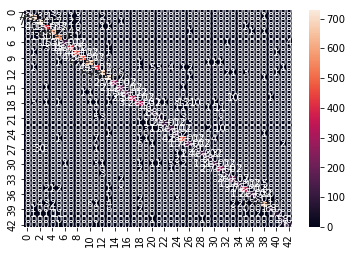

In [38]:
import seaborn as sns
sns.heatmap(confusion_matrix(labels, pred), annot=True)